# **IMPORTING LIBRARI**

In [1]:
import pandas as pd
import numpy as np
import scipy as stats
import seaborn as sns
import matplotlib.pyplot as plt

# **LOADING DATA**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Filoger/tamrin_quera/ML/InferentialStatistics/InferentialStatistics_marketing_AB-Ex05/marketing_AB.csv")


# **Data Overview**

In [3]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
df.tail()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23
588100,588100,1237779,ad,False,1,Tuesday,23


In [5]:
df.shape

(588101, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


# **EDA**

In [7]:
df = df.rename(columns={
                            "test group": "test_group",
                            "total ads": "total_ads",
                            "user id": "user_id",
                            "most ads day": "most_ads_day",
                            "most ads hour": "most_ads_hour",

                        })

In [8]:
df.isna().sum()

Unnamed: 0       0
user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64

In [9]:
df[df.duplicated()]

,Unnamed: 0,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour


In [10]:
df.describe(include=["int"])

,Unnamed: 0,user_id,total_ads,most_ads_hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279668,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


In [11]:
df.describe(include="object")

,test_group,most_ads_day
count,588101,588101
unique,2,7
top,ad,Friday
freq,564577,92608


In [12]:
df.nunique()

Unnamed: 0       588101
user_id          588101
test_group            2
converted             2
total_ads           807
most_ads_day          7
most_ads_hour        24
dtype: int64

In [13]:
df["converted"].describe()

count     588101
unique         2
top        False
freq      573258
Name: converted, dtype: object

In [14]:
df["converted"].value_counts()

False    573258
True      14843
Name: converted, dtype: int64

In [15]:
df["converted"].mean()

0.02523886203220195

In [16]:
df["test_group"].value_counts()

ad     564577
psa     23524
Name: test_group, dtype: int64

In [17]:
df.groupby(["test_group", "converted"])["total_ads"].mean()

test_group  converted
ad          False        23.274449
            True         83.905567
psa         False        23.697412
            True         83.276190
Name: total_ads, dtype: float64

In [18]:
df.groupby(["test_group", "converted"])["converted"].count()

test_group  converted
ad          False        550154
            True          14423
psa         False         23104
            True            420
Name: converted, dtype: int64

In [19]:
df.groupby(["test_group"])["converted"].mean()

test_group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64

In [20]:
pd.crosstab(df["test_group"], df["converted"], margins=all)

converted,False,True,All
test_group,,,
ad,550154,14423,564577
psa,23104,420,23524
All,573258,14843,588101


# **A-B TESTEING**

## **Method 1**

In [21]:
# جداسازی داده‌های مربوط به گروه ads
ads_data = df[df['test_group'] == 'ad']
n_ads = len(ads_data)

# جداسازی داده‌های مربوط به گروه psa
psa_data = df[df['test_group'] == 'psa']
n_psa = len(psa_data)

In [22]:
n_ads

564577

In [23]:
n_psa

23524

In [24]:
psa_data.converted.value_counts()

False    23104
True       420
Name: converted, dtype: int64

In [25]:
ads_data.converted.value_counts()

False    550154
True      14423
Name: converted, dtype: int64

In [26]:
d_mean = ads_data["converted"].mean() - psa_data["converted"].mean()
d_mean

0.007692453192201517

In [27]:
# تعداد کل کاربران
#n_total = df.shape[0]
n_total = n_ads + n_psa
n_total

588101

In [28]:
# تعداد کاربرانی که خرید کرده‌اند در هر گروه
ads_converted = np.sum(ads_data['converted'])
print(f"The number of users who have bought in the group ADS: {ads_converted}")
psa_converted = np.sum(psa_data['converted'])
print(f"The number of users who have bought in the group PSA: {psa_converted}")

The number of users who have bought in the group ADS: 14423
The number of users who have bought in the group PSA: 420


In [29]:
# احتمال مشاهده تبلیغات در گروه ads
# df.converted.mean()
p_ads = n_ads / n_total
print(f"The possibility of seeing ADS in the group: {p_ads}")

# احتمال عدم مشاهده تبلیغات در گروه psa
# 1 - df.converted.mean()
p_psa = 1 - (n_psa / n_total)
print(f"The possibility of not seeing PSA in the group: {p_ads}")

The possibility of seeing ADS in the group: 0.960000068015528
The possibility of not seeing PSA in the group: 0.960000068015528


In [30]:
# تعداد شبیه‌سازی‌ها
n_simulations = 10000

In [31]:
# شبیه‌سازی تعداد کاربرانی که خرید کرده‌اند در هر گروه با استفاده از روش باینومیال
ads_converted_simulated = np.random.binomial(n_ads, p_ads, n_simulations)
psa_converted_simulated = np.random.binomial(n_psa, p_psa, n_simulations)

In [32]:
ads_converted_simulated

array([541818, 542063, 542158, ..., 542267, 541908, 541966])

In [33]:
psa_converted_simulated

array([22586, 22594, 22582, ..., 22560, 22541, 22542])

In [34]:
# محاسبه نرخ خرید در هر یک از گروه‌ها
ads_conversion_rate_simulated = ads_converted_simulated / n_ads
print(f"ADS conversion rate simulated: {ads_conversion_rate_simulated}")

psa_conversion_rate_simulated = psa_converted_simulated / n_psa
print(f"PSA conversion rate simulated: {psa_conversion_rate_simulated}")

ADS conversion rate simulated: [0.9596884  0.96012236 0.96029062 ... 0.96048369 0.95984782 0.95995055]
PSA conversion rate simulated: [0.96012583 0.96046591 0.95995579 ... 0.95902057 0.95821289 0.9582554 ]


In [35]:
d_mean = ads_data["converted"].mean() - psa_data["converted"].mean()
d_mean

0.007692453192201517

In [36]:
# محاسبه اختلاف دو نرخ خرید
diff = ads_conversion_rate_simulated - psa_conversion_rate_simulated
diff

array([-0.00043743, -0.00034355,  0.00033483, ...,  0.00146311,
        0.00163493,  0.00169515])

In [37]:
d_mean = ads_data["converted"].mean() - psa_data["converted"].mean()


In [38]:
# محاسبه p-value
p_val = np.mean(diff >= d_mean) * 100
print(f"p-vlaue: {p_val}")

p-vlaue: 0.0


In [39]:
if p_val < 0.05:
    print(f'The difference in conversion rates between the ads and psa groups is statistically significant --> p-vlaue: {p_val}')
else:
    print(f'There is not enough evidence to suggest a significant difference in conversion rates between the ads and psa groups --> p-vlaue: {p_val}')

The difference in conversion rates between the ads and psa groups is statistically significant --> p-vlaue: 0.0




> **در اینجا حد آستانه رو 0.05 گرفتیم با توجه به نتیجه که کمتر از حد آستانه هست میتونیم بگیم که میزان تبلیغ در خرید تاثیر داشته است**



In [40]:
diff.mean()

-1.7687713491797207e-06

In [41]:
ab_data_diff = ads_data["converted"].mean() - psa_data["converted"].mean()
ab_data_diff

0.007692453192201517

In [42]:
(diff > ab_data_diff).mean() * 100

0.0

In [43]:
(diff < ab_data_diff).mean() * 100

100.0

## **Method 2**

In [44]:
def abtest_simulation(n_simulations):
    # جدا کردن داده‌های مربوط به گروه کنترل (دسته psa)
    control = df[df['test_group'] == 'psa']['converted']

    # جدا کردن داده‌های مربوط به گروه آزمایش (دسته ads)
    test = df[df['test_group'] == 'ad']['converted']

    # تعداد شبیه‌سازی‌های مورد نیاز برای انجام آزمون
    n_simulations = 1000

    # تفاوت میانگین دو گروه مشاهده شده
    obs_diff_mean = np.mean(test) - np.mean(control)

    # تعداد کل افراد در هر دو گروه
    n_control = len(control)
    n_test = len(test)

    # ادغام داده‌های دو گروه
    data = np.concatenate([control, test])

    # مجموعه خالی برای ذخیره تفاوت میانگین دو گروه
    diff_means = np.empty(n_simulations)

    # انجام آزمون تفاوت  بین دو گروه
    for i in range(n_simulations):
        # نمونه‌برداری تصادفی با جایگذاری از داده‌های مجموعه
        perm_data = np.random.choice(data, size=len(data), replace=True)

        # جدا کردن داده‌های مربوط به گروه کنترل و آزمایش
        perm_control = perm_data[:n_control]
        perm_test = perm_data[n_control:]

        # محاسبه تفاوت میانگین دو گروه به دست آمده از نمونه‌برداری تصادفی
        diff_means[i] = np.mean(perm_test) - np.mean(perm_control)

    # محاسبه مقدار p-value
    p_value = (np.abs(diff_means) >= np.abs(obs_diff_mean)).sum() / n_simulations
    # چاپ مقدار p-value
    print("p-value: ", p_value)

In [45]:
# e1 = abtest_simulation(10000)
# e1



> **در اینجا حد آستانه رو 0.05 گرفتیم با توجه به نتیجه که کمتر از حد آستانه هست میتونیم بگیم که میزان تبلیغ در خرید تاثیر داشته است**



In [48]:
ads_data2 = df[df['test_group'] == 'ad']

# جداسازی داده‌های مربوط به گروه psa
psa_data2 = df[df['test_group'] == 'psa']

In [49]:
df3 = ads_data2.merge(psa_data2, how="outer")

In [62]:
df3.test_group = df3.test_group.replace({"psa": 0, "ad": 1})
df3.converted = df3.converted.replace({False: 0, True: 1})

In [63]:
ad = df3.query("test_group  == 0 ")
psa = df3.query("test_group  == 1 ")

In [64]:
from scipy.stats import probplot

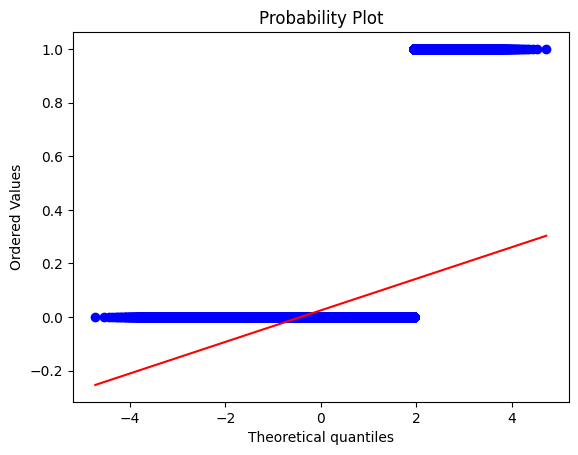

In [65]:
probplot(df3["converted"], plot=plt);

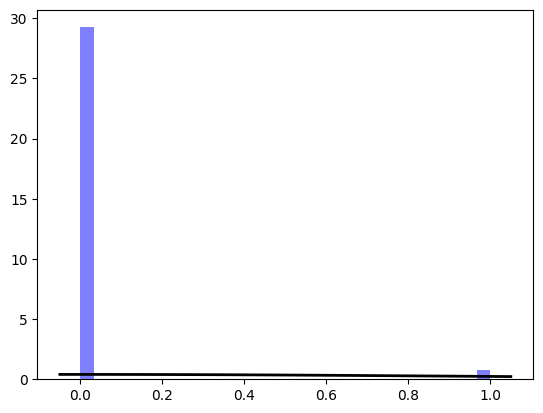

In [66]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

data = np.random.normal(0, 1, size=1000)

fig, ax = plt.subplots()
ax.hist(df3["converted"], bins=30, density=True, alpha=0.5, color='blue')

mu, std = norm.fit(data)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=2)

plt.show()